In [2]:
from brian2 import *
import matplotlib.pyplot as plt

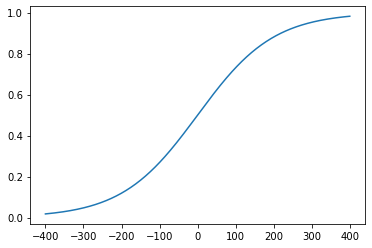

In [3]:
# exhaustible inhibition based on recent level of inhibitory input
gi_diff = np.linspace(-400, 400, 500)
# y = (3 * (np.exp(-(x/2)) - np.exp(-(x/3))))
# gi_diff = 20
y = 1/(1 + np.exp(-2*0.005*gi_diff))
plt.plot(gi_diff, y)
plt.show()


In [14]:
location = '/home/pshah/Documents/code/'
import sys; sys.path.append('%sutils_praj' % location)
sys.path.append('%sNeuronalModelling/' % location)

from brian_general_inhibition_exhaust import *
from brian2_utils import *

In [25]:
#%%
P, Pe, Pi, Ce, Ci, net, trace, s_mon, trace_z, trace_gi, x_mon, trace_gi_diff = build_network(record_id=[0,1,3,11,15])

net.run(5 * second, report='text')



Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 5s


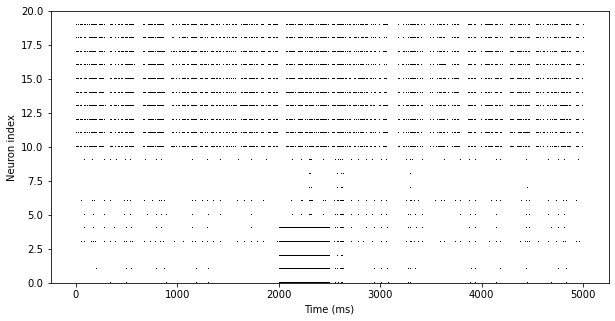

In [26]:
# plotting
plt.figure(figsize=[10,5])
plt.plot(s_mon.t/ms, s_mon.i, ',k')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.ylim(0,20)
plt.show()

In [22]:
# not sure that this actually works with very sparsely firing networks where some neurons have no firing
def make_spike_array(spike_monitor_trains, runtime, dt, binsize=10):
    ntotal = len(spike_monitor_trains)
    spike_array = np.empty([ntotal, int(runtime / dt)])

    for neuron in range(ntotal):
#         if neuron % 100 == 0:  # print the progress once every 100 cell iterations
#             print(neuron, " out of ", ntotal, " cells done")
        spike_locs = spike_monitor_trains[neuron]
        spike_array[neuron, spike_locs] = 1

    print('collected binned spikes rasters...')

    # collect 10ms spike bins  (with spike counts per bin as well)
    spike_counts_binned = np.empty([ntotal, int(runtime / dt / binsize)])
    spike_raster_binned = np.empty([ntotal, int(runtime / dt / binsize)])
    for set in range(int(runtime / dt / binsize)):
        spike_counts_binned[:, set] = np.sum(spike_array[:, set * binsize:set * binsize + binsize],
                                             axis=1)  # count the number of spikes per neuron in the 10ms bin
        spike_raster_binned[
            np.where(spike_counts_binned[:, set] > 0), set] = 1  # set a positive number of spikes per neuron to 1

    return spike_array, spike_raster_binned, spike_counts_binned

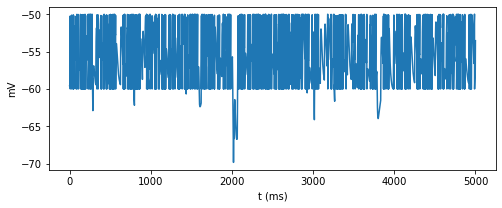

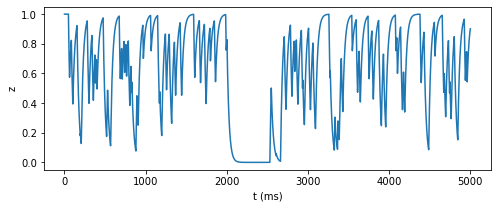

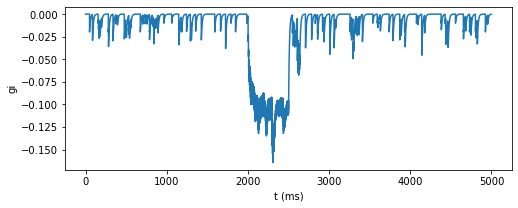

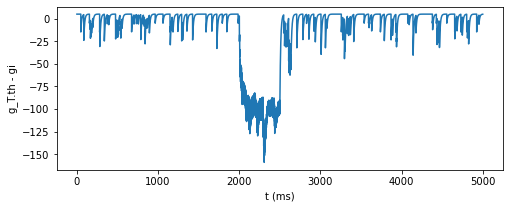

In [29]:
#%%
# individual neuron trace plotting
neuron = 11

figsize = [8,3]

plt.figure(figsize=figsize)
# plot(trace.t/ms, trace[10].v/mV)
plot(trace.t/ms, trace[neuron].v/mV)
# plt.plot(trace.t/ms, trace[100].v/mV)
xlabel('t (ms)')
ylabel('mV')
show()


plt.figure(figsize=figsize)
plot(trace_z.t/ms, trace_z[neuron].z)
xlabel('t (ms)')
ylabel('z')
show()

plt.figure(figsize=figsize)
plot(trace_gi.t/ms, trace_gi[neuron].gi)
xlabel('t (ms)')
ylabel('gi')
show()

plt.figure(figsize=figsize)
plot(trace_gi_diff.t/ms, trace_gi_diff[neuron].gi_diff)
xlabel('t (ms)')
ylabel('g_T.th - gi')
show()